In [6]:
import pandas as pd
table = pd.read_csv('jobs_data_cleaned.csv')
table.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_text,job_state,same state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$77K-$92K (Glassdoor Est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,84.5,Affinity Solution,NY,1,22,1,0,0,0,1
1,Data Scientist,$77K-$92K (Glassdoor Est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,84.5,ManTec,VA,0,52,0,0,0,0,0
2,Data Scientist,$77K-$92K (Glassdoor Est.),"By clicking the Apply button, I understand tha...",3.7,Takeda\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,...,84.5,Taked,MA,0,239,1,0,1,0,0
3,Data Scientist,$77K-$92K (Glassdoor Est.),Join Our Growing Team\nA career with A Place f...,3.0,A Place for Mom\n3.0,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,Company - Private,...,84.5,A Place for Mo,KS,0,20,1,0,0,1,1
4,Data Scientist,$77K-$92K (Glassdoor Est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,...,84.5,GovTec,CA,0,4,1,0,0,0,1


In [7]:
table.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_text',
       'job_state', 'same state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

### Feature Engineering

In [8]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [9]:
# Job title simplified
table['job_simp'] = table['Job Title'].apply(title_simplifier)
table['job_simp'].value_counts()

data scientist    627
na                175
data engineer      85
analyst            73
mle                16
manager            12
director           12
Name: job_simp, dtype: int64

In [10]:
# Seniority Level
table['seniority'] = table['Job Title'].apply(seniority)
table['seniority'].value_counts()

na        847
senior    152
jr          1
Name: seniority, dtype: int64

In [12]:
# Fix job_state
table['job_state'] = table['job_state'].apply(lambda x: x.strip())
table['job_state'].value_counts()

CA     218
MA      92
VA      91
NY      78
TX      48
WA      45
IL      41
MD      34
PA      31
CO      27
DC      26
NC      25
OH      21
GA      18
WI      17
MO      17
NJ      17
NAA     15
FL      15
TN      14
AL      12
MI      11
MN       9
UT       9
CT       9
NE       8
OR       6
IN       6
AZ       5
OK       4
RI       4
IA       4
ID       3
KS       3
HI       2
SC       2
KY       2
MS       2
NV       1
ME       1
LA       1
WV       1
NM       1
AR       1
ND       1
NH       1
DE       1
Name: job_state, dtype: int64

In [13]:
# Job Description Length
table['desc_len'] = table['Job Description'].apply(lambda x: len(x))

In [15]:
# Count of competitors
table['num_comp'] = table['Competitors'].apply(lambda x: len(x.strip(',')) if x != '-1' else 0)
table['num_comp']

0      36
1       0
2      24
3      56
4       0
       ..
995     0
996     0
997    11
998     0
999    25
Name: num_comp, Length: 1000, dtype: int64

In [17]:
# hourly wage to annual
table['min_salary'] = table.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
table['max_salary'] = table.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [18]:
table[table['hourly']==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
60,1,34,46
61,1,34,46
62,1,34,46
63,1,34,46
64,1,34,46
65,1,34,46
66,1,34,46
67,1,34,46
68,1,34,46
69,1,34,46


In [21]:
table['Company_text']

0      Affinity Solution
1                 ManTec
2                  Taked
3         A Place for Mo
4                 GovTec
             ...        
995          Shelf Engin
996           Wells Farg
997            Fannie Ma
998    XSELL Technologie
999                NYSTE
Name: Company_text, Length: 1000, dtype: object

In [22]:
table.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.581300,1650.801000,0.030000,83.550000,121.290000,101.820000,0.424000,31.525000,0.662000,0.003000,0.238000,0.239000,0.411000,3573.130000,10.038000
std,1.323818,741.158672,0.170673,24.945737,32.864052,29.383516,0.494438,44.513355,0.473265,0.054717,0.426072,0.426686,0.492261,1802.620357,17.724184
min,-1.000000,-1.000000,0.000000,34.000000,46.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,0.000000
25%,3.400000,1920.750000,0.000000,68.000000,101.000000,89.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2403.750000,0.000000
50%,3.800000,1995.000000,0.000000,83.000000,121.000000,99.500000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3352.500000,0.000000
75%,4.300000,2008.000000,0.000000,105.000000,138.000000,121.500000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4486.000000,21.000000
max,5.000000,2019.000000,1.000000,139.000000,229.000000,184.000000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18555.000000,92.000000


### Univariate Analysis

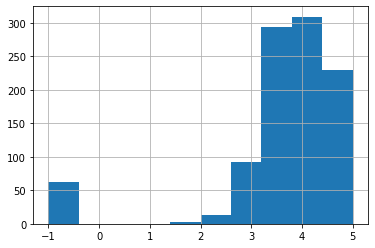

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
table['Rating'].hist();

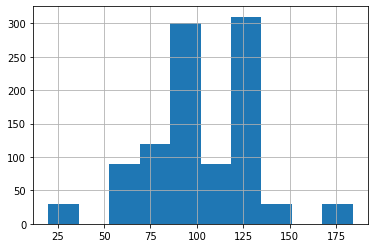

In [26]:
table['avg_salary'].hist();

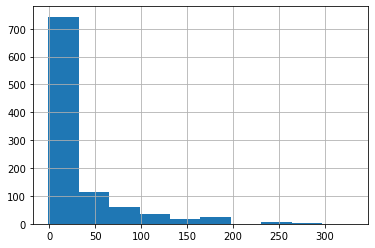

In [27]:
table['age'].hist();

In [29]:
table.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_text',
       'job_state', 'same state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

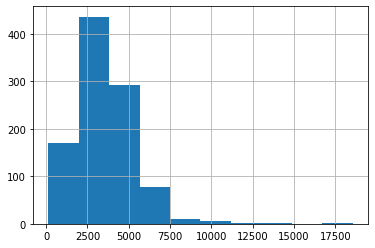

In [30]:
table['desc_len'].hist();

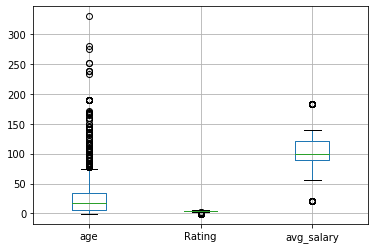

In [33]:
table.boxplot(column = ['age','Rating', 'avg_salary'])